In [1]:
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/

In [11]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import numpy
print ("libraries loaded")

libraries loaded


In [6]:
# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

print (type(series), series.shape)

<class 'pandas.core.series.Series'> (3649,)


In [4]:
# display first few rows
print(series.head(20))

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
Name: 20.7, dtype: float64


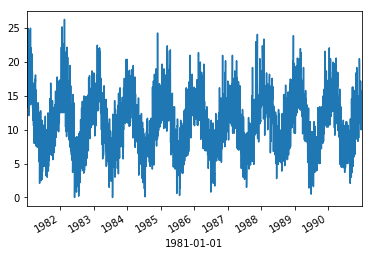

In [5]:
# line plot of dataset
series.plot()
pyplot.show()

In [7]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('daily-minimum-temperatures-dataset.csv')
validation.to_csv('daily-minimum-temperatures-validation.csv')

Dataset 3642, Validation 7


In [12]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

print ("functions loaded")

functions loaded


In [18]:
# load dataset
#series = Series.from_csv('daily-minimum-temperatures-dataset.csv', header=None)
#dataset.to_csv('daily-minimum-temperatures-dataset.csv')
#NB: 

print ("start")
# seasonal difference
X = dataset.values
print ("type(X):", type(X), X.shape)
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
#NB: this ARIMA model could be improved by tuning parameters.

model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())
print ("end")

start
type(X): <class 'numpy.ndarray'> (3642,)
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3277
Model:                     ARMA(7, 1)   Log Likelihood               -8671.331
Method:                       css-mle   S.D. of innovations              3.411
Date:                Sat, 23 Sep 2017   AIC                          17362.662
Time:                        11:35:08   BIC                          17423.609
Sample:                             0   HQIC                         17384.486
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.132      0.113      0.910      -0.244       0.274
ar.L1.y        1.1434      0.288      3.973      0.000       0.579       1.707
ar.L2

In [32]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
print (type(forecast))
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
#print (type(forecast), forecast.shape, forecast, type(forecast[0]), forecast[0])
print ("forecast value :", float("{:.3f}".format(forecast[0])) )

<class 'numpy.ndarray'>
forecast value : 14.861


In [33]:
model_fit# one-step out of sample forecast
print (type(model_fit))
start_index = len(differenced)
end_index = len(differenced)
print ("start_index:", start_index)
print ("end_index:", end_index)
#NB: use indexes, had problems when tried datetime string or datetime object.
forecast = model_fit.predict(start=start_index, end=end_index)
print (type(forecast), forecast.shape, forecast)

<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
start_index: 3277
end_index: 3277
<class 'numpy.ndarray'> (1,) [-1.53864208]


In [36]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
print (type(forecast), forecast.shape, forecast)

<class 'numpy.ndarray'> (7,) [-1.53864208 -0.36893871  0.03232874  0.02320555  0.02294936  0.0167073
 -0.02389483]


In [38]:
# invert the differenced forecast to something usable
history = [x for x in X]
print (type(X), X.shape)
print (type(history), len(history))

day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1
    

<class 'numpy.ndarray'> (3642,)
<class 'list'> 3642
Day 1: 14.861358
Day 2: 15.631061
Day 3: 13.332329
Day 4: 11.723206
Day 5: 10.422949
Day 6: 14.416707
Day 7: 12.676105


In [41]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
print (type(forecast))
print (forecast)

history = [x for x in X]
print (type(X), X.shape)
print (type(history), len(history))

day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1
    

<class 'numpy.ndarray'>
[-1.53864208 -0.36893871  0.03232874  0.02320555  0.02294936  0.0167073
 -0.02389483]
<class 'numpy.ndarray'> (3642,)
<class 'list'> 3642
Day 1: 14.861358
Day 2: 15.631061
Day 3: 13.332329
Day 4: 11.723206
Day 5: 10.422949
Day 6: 14.416707
Day 7: 12.676105
